In [1]:
%matplotlib inline

C:\Users\northshire\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


File loader started...
File loaded successfully.
 0 - [S] [          Bath] [1247] [105]
 1 - [N] [    Birkenhead] [1668] [ 17]
 2 - [S] [    Birmingham] [1466] [  5]
 3 - [N] [     Blackburn] [1800] [ 14]
 4 - [N] [     Blackpool] [1609] [ 18]
 5 - [N] [        Bolton] [1558] [ 10]
 6 - [N] [        Bootle] [1807] [ 15]
 7 - [S] [   Bournemouth] [1299] [ 78]
 8 - [N] [      Bradford] [1637] [ 10]
 9 - [S] [      Brighton] [1359] [ 84]
10 - [S] [       Bristol] [1392] [ 73]
11 - [N] [       Burnley] [1755] [ 12]
12 - [S] [       Cardiff] [1519] [ 21]
13 - [S] [      Coventry] [1307] [ 78]
14 - [S] [       Croydon] [1254] [ 96]
15 - [N] [    Darlington] [1491] [ 20]
16 - [N] [         Derby] [1555] [ 39]
17 - [N] [     Doncaster] [1428] [ 39]
18 - [S] [      East Ham] [1318] [122]
19 - [S] [        Exeter] [1260] [ 21]
20 - [N] [     Gateshead] [1723] [ 44]
21 - [N] [       Grimsby] [1379] [ 94]
22 - [N] [       Halifax] [1742] [  8]
23 - [N] [  Huddersfield] [1574] [  9]
24 - [N] [     

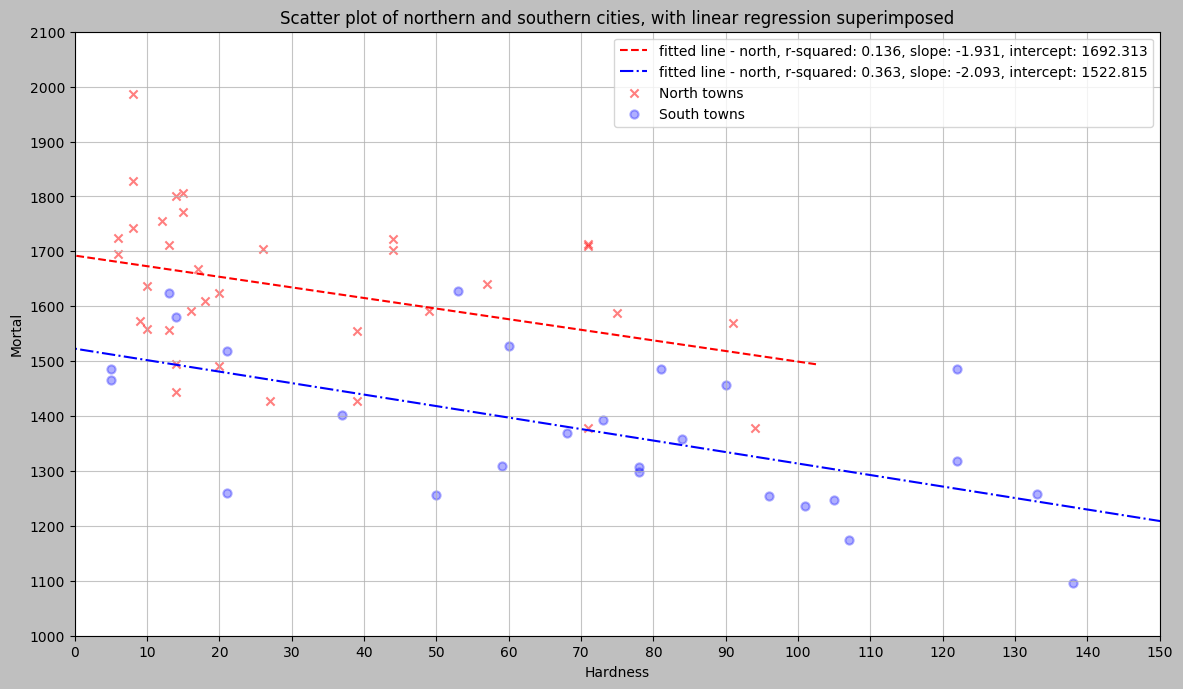

In [1]:
# -*- coding: utf-8 -*-
import scipy.stats
import statsmodels.stats.weightstats
import statsmodels.stats.diagnostic
import statsmodels.stats.descriptivestats
import numpy as np
import matplotlib.pyplot as plt
import LoadFromFile
import re
from collections import OrderedDict

# function that draws 10% longer line at the edges
def get_x_y_linear_reg_fit(x, intercept, slope, overdraw=0.1):
    x_reg_start = min(x) - np.ptp(x)*overdraw
    x_reg_end = max(x) + np.ptp(x)*overdraw
    x_reg = [x_reg_start, x_reg_end]
    y_reg = [intercept + slope*x_reg_start, intercept + slope*x_reg_end]
    return x_reg, y_reg


def get_data_array_from_file(file_name=''):
    """
    Parses provided file and creates an array containing all elements
    that are matched with regex.

    Parameters
    --------
    file_name : string
        Name of a file that will be converted (if possible) to array of elements

    Returns
    --------
    data : 2-D array
        Array containing all matching elements. Each element is also an array of variables
    """
    print 'File loader started...'
    if not file_name:
        print 'No file selected, aborting...'
        return
    fname = file_name
    with open(fname) as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    # content = [x.strip() for x in content]
    content = [x.strip('\n') for x in content]

    regex = "^(\*|\s)([a-zA-z\s]+?)\s+(\d+)\s+(\d+)"
    data = []
    not_found = 0

    for line in content:
        try:
            matchObj = re.match(regex, line)

            location = 'N' if matchObj.group(1) == '*' else 'S'
            city_name = matchObj.group(2)
            mortality = int(matchObj.group(3))
            hardness = int(matchObj.group(4))

            data.append((location, city_name, mortality, hardness))
        except AttributeError:
            not_found += 1
            # print 'Line', content.index(line) + 1, 'not matching: ', line
    print 'File loaded successfully.'
    return data

# initialize data arrays
fname = 'water.txt'
data_water = get_data_array_from_file(fname)
observation_id = 0
for j in data_water:
    if j[0] == 'N':
        c = '\033[31m'
    else:
        c = '\033[34m'
    print '%s%2d - [%1s] [%14s] [%4d] [%3d]' % (c, observation_id, j[0], j[1], j[2], j[3])
    observation_id += 1
print '\033[0m'

hardness_north = []
hardness_south = []
hardness_overall = []
mortality_north = []
mortality_south = []
mortality_overall = []

for data in data_water:
    hardness_overall.append(data[3])
    mortality_overall.append(data[2])
    if data[0] == 'N':
        mortality_north.append(data[2])
        hardness_north.append(data[3])
    else:
        mortality_south.append(data[2])
        hardness_south.append(data[3])

# task implementations
print 'Main.py'
print '---------------'
print 'Task 2.6 -> Scatter plot of northern and southern cities, with linear regression superimposed'

plt.figure(figsize=(14, 8), dpi=100, facecolor='#00000040')
plt.title('Scatter plot of northern and southern cities, with linear regression superimposed')
plt.xlabel('Hardness')
plt.ylabel('Mortal')
plt.xticks(range(0, int(max(hardness_overall)*1.1), 10))
plt.yticks(range(0, int(max(mortality_overall)*1.1), 100))
plt.xlim(xmin=0)
plt.ylim(ymin=1000)
plt.grid(visible=True, alpha=0.75)

plt.scatter(hardness_north, mortality_north, marker='x', color='#ff000080', s=35, lw=1.5, label='North towns')
plt.scatter(hardness_south, mortality_south, marker='o', color='#0000ff50', s=35, lw=1.5, label='South towns')

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(hardness_north, mortality_north)
x_reg, y_reg = get_x_y_linear_reg_fit(hardness_north, intercept, slope)
legend_string = 'fitted line - north, r-squared: %.3f, slope: %.3f, intercept: %.3f' % (round(r_value ** 2, 3), slope, intercept)
plt.plot(x_reg, y_reg, 'r--', label=legend_string)

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(hardness_south, mortality_south)
x_reg, y_reg = get_x_y_linear_reg_fit(hardness_south, intercept, slope)
legend_string = 'fitted line - north, r-squared: %.3f, slope: %.3f, intercept: %.3f' % (round(r_value ** 2, 3), slope, intercept)
plt.plot(x_reg, y_reg, 'b-.', label=legend_string)

plt.legend()
plt.show()


Main.py
---------------
Task 2.2 -> Boxplots of hardness and mortality in northern and southern cities


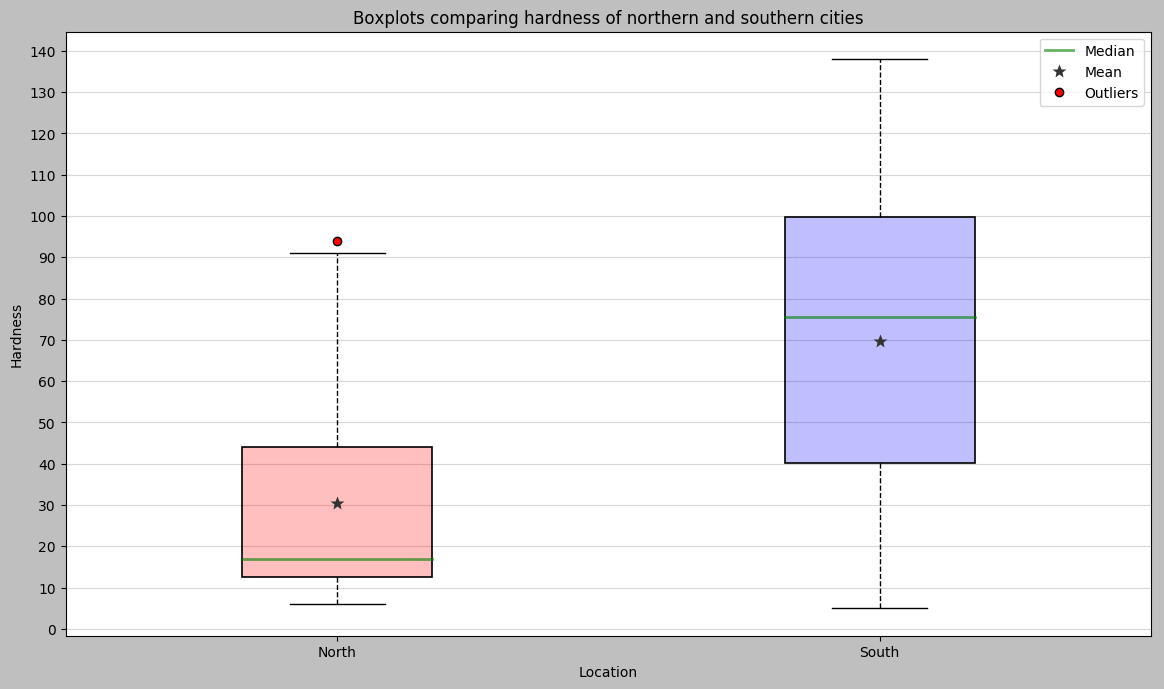

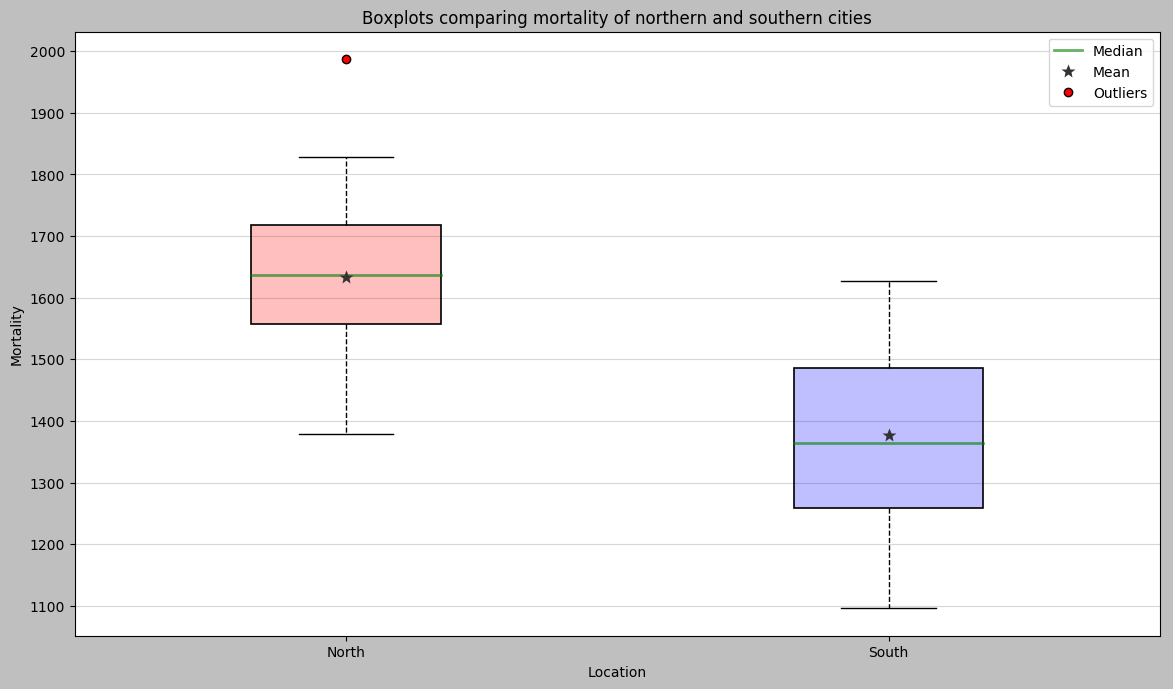

In [3]:
print '\nMain.py\n---------------'
print 'Task 2.2 -> Boxplots of hardness and mortality in northern and southern cities'

plt.close()

databox_hardness = [hardness_north, hardness_south]
databox_mortality = [mortality_north, mortality_south]

# boxplots - hardness
# -------------------
plt.figure(figsize=(14, 8), dpi=100, facecolor='#00000040')
plt.title('Boxplots comparing hardness of northern and southern cities')
plt.xlabel('Location')
plt.ylabel('Hardness')
plt.yticks(range(0, int(max(hardness_overall)*1.1), 10))
plt.grid(visible=True, axis='y', alpha=0.5)
boxplot = plt.boxplot(databox_hardness, widths=0.35, labels=['North', 'South'], showmeans=True, patch_artist=True,
                      flierprops=dict(marker='o', markerfacecolor='red', markersize=6, label='Outliers'),
                      meanprops=dict(marker='*', markerfacecolor='#333333ff', markeredgecolor='#00000000', markersize=10, color='#00000000', label='Mean'),
                      medianprops=dict(linewidth=2, linestyle='-', color='#00800099', label='Median'),
                      boxprops=dict(linewidth=1.2),
                      whiskerprops=dict(linestyle='--'))

# color boxplots
box_colors = ['#ff000040', '#0000ff40']
for patch, color in zip(boxplot['boxes'], box_colors):
    patch.set_facecolor(color)

# remove duplicated legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()
# plt.close()

# boxplots - mortality
# --------------------
plt.figure(figsize=(14, 8), dpi=100, facecolor='#00000040')
plt.title('Boxplots comparing mortality of northern and southern cities')
plt.xlabel('Location')
plt.ylabel('Mortality')
plt.yticks(range(0, int(max(mortality_overall)*1.1), 100))
plt.grid(visible=True, axis='y', alpha=0.5)
boxplot = plt.boxplot(databox_mortality, widths=0.35, labels=['North', 'South'], showmeans=True, patch_artist=True,
                      flierprops=dict(marker='o', markerfacecolor='red', markersize=6, label='Outliers'),
                      meanprops=dict(marker='*', markerfacecolor='#333333ff', markeredgecolor='#00000000', markersize=10, color='#00000000', label='Mean'),
                      medianprops=dict(linewidth=2, linestyle='-', color='#00800099', label='Median'),
                      boxprops=dict(linewidth=1.2),
                      whiskerprops=dict(linestyle='--'))

# color boxplots
box_colors = ['#ff000040', '#0000ff40']
for patch, color in zip(boxplot['boxes'], box_colors):
    patch.set_facecolor(color)

# remove duplicated legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())

plt.show()
plt.close()

In [ ]:
print '\nMain.py\n---------------'
print 'Task 2.1 -> PROC UNIVARIATE reproduction in Python 2.7'


# PROC UNIVARIATE - SAS equivalent
def proc_univariate_line_printer(data_to_analyze, variable_name='NONAME', alpha_threshold=0.05):
    # color codes
    col_w = '\033[0m'
    col_r = '\033[31m'
    col_g = '\033[32m'
    col_lb = '\033[34m'
    col_m = '\033[35m'
    col_c = '\033[36m'
    col_gray = '\033[37m'

    # display variables
    title_str = 'Variable: %s%s%s' % (col_m, variable_name, col_w)

    margins = [[61],
               [29, 29],
               [18, 19, 18],
               [13, 13, 13, 13]]

    quantile_descriptions = {'Name': ['Max', '', '', '', 'Q3', 'Median', 'Q1', '', '', '', 'Min'],
                             'Perc': [100, 99, 95, 90, 75, 50, 25, 10, 5, 1, 0],
                             'Val': [],
                             'Norm': []}

    def get_pval_string(pval, thresh_down=0.1 ** 4, thresh_up=0.15):
        if pval < alpha_threshold:
            color_code = col_r
        else:
            color_code = col_g
        if pval < thresh_down:
            value_str = "%s<%6.4f%s" % (color_code, thresh_down, col_w)
            return value_str
        else:
            if thresh_up and pval > thresh_up:
                value_str = "%s>%6.4f%s" % (color_code, thresh_up, col_w)
                return value_str
            else:
                value_str = "%s%7.4f%s" % (color_code, pval, col_w)
        return value_str

    def print_heading(title, window_width=61, text_color=col_c):
        print '/', ''.center(window_width, '-'), '\\'
        print '|%s' % text_color, title.center(window_width), '%s|' % col_w
        print '|', ''.center(window_width, '-'), '|'

    def print_subheadings(titles, text_color=col_w):
        if len(titles) > len(margins):
            raise ValueError("Only up to 4 subheadings in 1 row are currently supported.")
        if len(titles) < 1:
            raise ValueError("Subheadings array cannot be empty.")
        widths = margins[len(titles) - 1]
        print '|',
        for title, width in zip(titles, widths):
            print '%s%s%s' % (text_color, title.center(width), col_w), '|',
        print ''
        print '|', ''.center(sum(widths) + 3 * (len(titles) - 1), '-'), '|'

    def print_hypothesis(pval, test_type):
        if test_type not in ["normality", "mean", "median"]:
            raise ValueError("Test type should be either 'wilcox' or 'pratt' or 'zsplit'")

        if test_type == 'normality':
            if pval > alpha_threshold:
                print '%s*%s Can not reject hypothesis H0, that the sample is drawn from normal distributed population.' % (col_g, col_w)
            else:
                print '%s*%s Hypothesis H0 can be rejected, that the sample is drawn from normal distributed population.' % (col_r, col_w)
        if test_type == 'mean':
            if pval > alpha_threshold:
                print '%s*%s Can not reject hypothesis H0, that the population mean is equal to 0.' % (col_g, col_w),
            else:
                print '%s*%s Hypothesis H0 can be rejected, that the population mean is equal to 0.' % (col_r, col_w),
            print 'Sample mean: ', mean_univariate
        if test_type == 'median':
            if pval > alpha_threshold:
                print '%s*%s Can not reject hypothesis H0, that the population median is equal to 0.' % (col_g, col_w),
            else:
                print '%s*%s Hypothesis H0 can be rejected, that the population median is equal to 0.' % (col_r, col_w),
            print 'Sample median: ', median

    # /---------------------------------------------------------------------\
    # |               C A L C U L A T I O N    S E C T I O N                |
    # \---------------------------------------------------------------------/
    def get_uncorrected_sumsquares():
        uncorr_ss = 0
        for obs in univariate_data:
            uncorr_ss += obs ** 2
        return uncorr_ss

    def get_corrected_sumsquares():
        corr_ss = 0
        for obs in univariate_data:
            corr_ss += (obs - mean_univariate) ** 2
        return corr_ss

    # basic variables
    univariate_data = data_to_analyze

    # moments
    observation_amount = len(univariate_data)
    sum_weights = observation_amount
    mean_univariate = np.mean(univariate_data).item()
    sum_observations = np.sum(univariate_data).item()
    std_dev = np.std(univariate_data, ddof=1).item()
    var = np.var(univariate_data, ddof=1).item()
    skewness = scipy.stats.skew(univariate_data, bias=False)
    kurtosis = scipy.stats.kurtosis(univariate_data, bias=False)
    uncorrected_ss = get_uncorrected_sumsquares()
    corrected_ss = get_corrected_sumsquares()
    coeff_variation = std_dev / mean_univariate * 100
    std_err_mean = std_dev / np.sqrt(observation_amount)

    # location and variability
    median = np.median(univariate_data).item()
    mode = scipy.stats.mode(univariate_data)
    total_range = np.ptp(univariate_data).item()
    iqr_range = scipy.stats.iqr(univariate_data)

    # tests
    ttest_st, ttest_pval = scipy.stats.ttest_1samp(univariate_data, popmean=0)
    sign_st, sign_pval = statsmodels.stats.descriptivestats.sign_test(univariate_data, mu0=0)
    wilcoxon_st, wp = scipy.stats.wilcoxon(univariate_data, univariate_data, zero_method='zsplit')
    ws, wilcoxon_pval = scipy.stats.wilcoxon(univariate_data)
    shapiro_st, shapiro_pval = scipy.stats.shapiro(univariate_data)
    kol_smir_st, kol_smir_pval = statsmodels.stats.diagnostic.kstest_normal(univariate_data)
    cramer_mises_st, cramer_mises_pval = [0, -1]  # no cramer-von mises function
    anderson_st, anderson_pval = statsmodels.stats.diagnostic.normal_ad(np.array(univariate_data))

    # data percentiles
    for percent in quantile_descriptions['Perc']:
        quantile_descriptions['Val'].append(np.percentile(univariate_data, percent, interpolation='midpoint'))

    # extreme observations - k-lowest and k-highest observations
    k = 5
    temp_arr = np.array(univariate_data)
    indexes_lowest = temp_arr.argsort()[:k]
    indexes_highest = temp_arr.argsort()[-k:]
    elements_lowest = []
    elements_highest = []
    for i in range(k):
        elements_lowest.append(univariate_data[indexes_lowest[i]])
        elements_highest.append(univariate_data[indexes_highest[i]])

    # estimate normal distribution percentiles
    norm_estimate = scipy.stats.norm(mean_univariate, std_dev)
    for norm_percent in quantile_descriptions['Perc']:
        quantile_descriptions['Norm'].append(norm_estimate.ppf(norm_percent / 100.))

    # /---------------------------------------------------------------------\
    # |                   D I S P L A Y   S E C T I O N                     |
    # \---------------------------------------------------------------------/
    print ''
    print '|-----------------------------------------------------------------------------------------------|'
    print '%sStart.%s' % (col_g, col_w)
    print 'The UNIVARIATE procedure'
    print ''
    print '', title_str.center(71), ''
    print ''

    print_heading('Moments')
    print '|', '%-16s %12d | %-17s %11d' % ('N', observation_amount, 'Sum Weights', sum_weights), '|'
    print '|', '%-16s %12.2f | %-17s %11.2f' % ('Mean', mean_univariate, 'Sum Observations', sum_observations), '|'
    print '|', '%-16s %12.2f | %-17s %11.2f' % ('Std Deviation', std_dev, 'Variance', var), '|'
    print '|', '{:<16} {:12.2f} | {:<17} {:11.2f}'.format('Skewness', skewness, 'Kurtosis', kurtosis), '|'
    print '|', '%-16s %12.2f | %-17s %11.2f' % ('Uncorrected SS', uncorrected_ss, 'Corrected SS', corrected_ss), '|'
    print '|', '%-16s %12.2f | %-17s %11.2f' % ('Coeff Variation', coeff_variation, 'Std Error Mean', std_err_mean), '|'
    print '\\', ''.center(61, '-'), '/'

    print ''
    print ''

    print_heading('Basic Statistical Measures')
    print_subheadings(['Location', 'Variability'], )
    print '|', '%-16s %12.5f | %-16s %12.5f' % ('Mean', mean_univariate, 'Std Deviation', std_dev), '|'
    print '|', '%-16s %12.5f | %-16s %12.5f' % ('Median', median, 'Variance', var), '|'
    print '|', '%-16s %12.5f | %-16s %12.5f' % ('Mode', float(mode[0][0]), 'Range', total_range), '|'
    print '|', '%21s         | %-16s %12.5f' % ('', 'Iqr Range', iqr_range), '|'
    print '|', ''.center(61, '-'), '|'
    print '|%s' % col_lb, 'NOTE: The mode displayed is the smallest of all modes'.center(61), '%s|' % col_w
    note_line2 = 'with a count of %d.' % mode[1][0]
    print '|%s' % col_lb, note_line2.center(61), '%s|' % col_w
    print '\\', ''.center(61, '-'), '/'

    print ''
    print ''

    print_heading('Tests for Location: Mu0=0')
    print_subheadings(['Test', '-Statistics-', '-----P-value-----'])
    print '|', '%-18s | %-4s %14.6f | %-10s %4s' % ('Student\'s t', 't', ttest_st, 'Pr > |t|', get_pval_string(ttest_pval, thresh_up=0.1)), '|',
    print_hypothesis(ttest_pval, 'mean')
    print '|', '%-18s | %-4s %14.6f | %-10s %4s' % ('Sign', 'M', sign_st, 'Pr >= |M|', get_pval_string(sign_pval, thresh_up=0.1)), '|',
    print_hypothesis(sign_pval, 'median')
    print '|', '%-18s | %-4s %14.6f | %-10s %4s' % ('Signed Rank', 'S', wilcoxon_st, 'Pr >= |S|', get_pval_string(wilcoxon_pval, thresh_up=0.1)), '|',
    print_hypothesis(wilcoxon_pval, 'mean')
    print '\\', ''.center(61, '-'), '/'

    print ''

    print_heading('Tests for Normality')
    print_subheadings(['Test', '--Statistics--', '-----P-value-----'])
    print '|', '%-18s | %-8s %10.6f | %-10s %4s' % ('Shapiro-Wilk', 'W', shapiro_st, 'Pr < W', get_pval_string(shapiro_pval, thresh_up=0)), '|',
    print_hypothesis(shapiro_pval, 'normality')
    print '|', '%-18s | %-8s %10.6f | %-10s %4s' % ('Kolmogorov-Smirnov', 'D', kol_smir_st, 'Pr < D', get_pval_string(kol_smir_pval, 0.01, 0.15)), '|',
    print_hypothesis(kol_smir_pval, 'normality')
    print '|%s' % col_gray, '%-18s | %-8s %10.6f | %-10s %4s' % ('Cramer-von Mises', 'W-Sq', cramer_mises_st, 'Pr < W-Sq', get_pval_string(cramer_mises_pval, 0.005, 0.25)), '|',
    print_hypothesis(cramer_mises_pval, 'normality')
    print '|', '%-18s | %-8s %10.6f | %-10s %4s' % ('Anderson-Darling', 'A-Sq', anderson_st, 'Pr < A-Sq', get_pval_string(anderson_pval, 0.005, 0.25)), '|',
    print_hypothesis(anderson_pval, 'normality')

    print '\\', ''.center(61, '-'), '/'

    print ''
    print ''

    print_heading('Quantiles (Definition 5)')
    print_subheadings(['Quantile', 'Estimate'])
    for q_name, q_perc, q_val in zip(quantile_descriptions['Name'], quantile_descriptions['Perc'], quantile_descriptions['Val']):
        print '|', '%14d%% %-8s      | %19.2f          ' % (q_perc, q_name, q_val), '|'
    print '\\', ''.center(61, '-'), '/'

    print ''

    print_heading('Extreme Observations')
    print_subheadings(['----Lowest----', '----Highest----'])
    print_subheadings(['Value', 'Obs', 'Value', 'Obs'])
    for i in range(k):
        print '|', '%9g     | %8g      | %9g     | %8g     ' % (elements_lowest[i], indexes_lowest[i] + 1, elements_highest[i], indexes_highest[i] + 1), '|'
    print '\\', ''.center(61, '-'), '/'

    print ''
    print ''

    print_heading('Fitted Distribution for %s' % variable_name)
    print_subheadings(['Parameters for Normal Distribution'])
    print_subheadings(['Parameter', 'Symbol', 'Estimate'])
    print '|', '    %-14s |        %-12s | %13.3f     ' % ('Mean', 'Mu', mean_univariate), '|'
    print '|', '    %-14s |        %-12s | %13.3f     ' % ('Std Dev', 'Sigma', std_dev), '|'
    print '\\', ''.center(61, '-'), '/'

    print ''

    print_heading('Goodnes-of-Fit Tests for Normal Distribution')
    print_subheadings(['Test', '---Statistics---', '-----P-value-----'])
    print '|', '%-18s | %-7s %-11.9f | %-10s %4s' % ('Kolmogorov-Smirnov', 'D', kol_smir_st, 'Pr > D', get_pval_string(kol_smir_pval, 0.01, 0.15)), '|'
    print '|%s' % col_gray, '%-18s | %-7s %-11.9f | %-10s %4s' % ('Cramer-von Mises', 'W-Sq', cramer_mises_st, 'Pr > W-Sq', get_pval_string(cramer_mises_pval, 0.005, 0.25)), '|\033[0m'
    print '|', '%-18s | %-7s %-11.9f | %-10s %4s' % ('Anderson-Darling', 'A-Sq', anderson_st, 'Pr > A-Sq', get_pval_string(anderson_pval, 0.005, 0.25)), '|'
    print '\\', ''.center(61, '-'), '/'

    print ''
    print ''

    print_heading('Quantiles for Normal Distribution')
    print '|', ''.center(18), '|', '------Quantile------'.center(40), '|'
    print_subheadings(['Percent', 'Observed', 'Estimated'])
    for q_perc, q_val, q_norm in zip(reversed(quantile_descriptions['Perc']),
                                     reversed(quantile_descriptions['Val']),
                                     reversed(quantile_descriptions['Norm'])):
        print '|', '%12.1f       | %14.2f      | %13.2f     ' % (q_perc, q_val, q_norm), '|'
    print '\\', ''.center(61, '-'), '/'

    print ''
    print '%sEnd.%s' % (col_r, col_w)
    print '|-----------------------------------------------------------------------------------------------|'

proc_univariate_line_printer(mortality_overall, variable_name='Mortal', alpha_threshold=0.05)
proc_univariate_line_printer(hardness_overall, variable_name='Hardness', alpha_threshold=0.05)


Main.py
---------------
Task 2.1 -> PROC UNIVARIATE reproduction in Python 2.7

|-----------------------------------------------------------------------------------------------|
Start.
The UNIVARIATE procedure

                        Variable: Mortal                        

/ ------------------------------------------------------------- \
|                            Moments                            |
| ------------------------------------------------------------- |
| N                          61 | Sum Weights                61 |
| Mean                  1524.15 | Sum Observations     92973.00 |
| Std Deviation          187.67 | Variance             35219.56 |
| Skewness                -0.08 | Kurtosis                -0.49 |
| Uncorrected SS   143817743.00 | Corrected SS       2113173.67 |
| Coeff Variation         12.31 | Std Error Mean          24.03 |
\ ------------------------------------------------------------- /


/ ----------------------------------------------------------

In [ ]:
print '\nMain.py\n---------------'
print 'Task 2.4 -> Histograms of mortality and water hardness with kernel densities superimposed'

plt.close('all')
# Hardness
# -------------
plt.figure(figsize=(14, 8), dpi=100, facecolor='#00000040')
plt.title('Hardness of water in both northern and southern towns')
plt.xlabel('Hardness')
plt.ylabel('Percent')
plt.grid(visible=True, axis='y', alpha=0.75)

# hardness histogram
bins_array = [0, 25, 50, 75, 100, 125, 150]
n, bins, patches = plt.hist(hardness_overall, normed=1, facecolor='#0000ff33', edgecolor='black', linewidth='1.5', bins=bins_array)
plt.xticks(bins, bins)
plt.xlim(xmin=-45, xmax=190)

# kernel distribution function (normed histogram)
x_hardness_kernel = np.linspace(-45, 190, 100)
kernel_hardness_bw03 = scipy.stats.gaussian_kde(hardness_overall, bw_method=0.3)
plt.plot(x_hardness_kernel, kernel_hardness_bw03(x_hardness_kernel), 'b--', lw=2, alpha=0.4, label='Kernel density estimation (bandwith=0.3)')
kernel_hardness_bw05 = scipy.stats.gaussian_kde(hardness_overall, bw_method=0.5)
plt.plot(x_hardness_kernel, kernel_hardness_bw05(x_hardness_kernel), 'b', lw=3, alpha=1, label='Kernel density estimation (bandwith=0.5)')

# normal distribution estimation
x_hardness_normal = np.linspace(-45, 190, 100)
mean_hardness = np.mean(hardness_overall)
stddev_hardness = np.std(hardness_overall, ddof=1)
plt.plot(x_hardness_normal, scipy.stats.norm.pdf(x_hardness_normal, mean_hardness, stddev_hardness), 'k--', lw=3, alpha=0.6, label='Normal distribution estimation')

plt.legend()
plt.show()

# Mortality
# ----------------
plt.figure(figsize=(14, 8), dpi=100, facecolor='#00000040')
plt.title('Moratilty rate in both northeren and southern towns')
plt.xlabel('Mortal')
plt.ylabel('Percent')
plt.grid(visible=True, axis='y', alpha=0.75)

# mortality histogram
bins_array = [1050, 1200, 1350, 1500, 1650, 1800, 1950, 2100]
n, bins, patches = plt.hist(mortality_overall, normed=1, facecolor='#ff000033', edgecolor='black', linewidth='1.5', bins=bins_array)
plt.xticks(bins, bins)
plt.xlim(xmin=800, xmax=2200)

# kernel distribution function (normed histogram)
x_mortality_kernel = np.linspace(800, 2200, 100)
kernel_mortality_bw03 = scipy.stats.gaussian_kde(mortality_overall, bw_method=0.3)
plt.plot(x_mortality_kernel, kernel_mortality_bw03(x_mortality_kernel), 'r--', lw=2, alpha=0.4, label='Kernel density estimation (bandwith=0.3)')
kernel_mortality_bw05 = scipy.stats.gaussian_kde(mortality_overall, bw_method=0.5)
plt.plot(x_mortality_kernel, kernel_mortality_bw05(x_mortality_kernel), 'r', lw=3, alpha=1, label='Kernel density estimation (bandwith=0.5)')

# normal distribution estimation
x_mortality_normal = np.linspace(800, 2200, 100)
mean_mortality = np.mean(mortality_overall)
stddev_mortality = np.std(mortality_overall, ddof=1)
plt.plot(x_mortality_normal, scipy.stats.norm.pdf(x_mortality_normal, mean_mortality, stddev_mortality), 'k--', lw=3, alpha=0.6, label='Normal distribution estimation')

plt.legend()
plt.show()